# <b><span style='color:#F1A424'>AutoML - Binary Classification - Titanic Survival Prediction</span> </b> 

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview - Binary Classification </b>
    


The Titanic dataset is a well-known dataset in the field of machine learning and data science. It contains information about passengers aboard the RMS Titanic, including whether they survived or not. The dataset is often used for predictive modeling and classification tasks. Here are some key details about the Titanic dataset:

**Features**:

- `PassengerId`: Unique identifier for each passenger.
- `Pclass`: Ticket class (1st, 2nd, or 3rd).
- `Name`: Passenger's name.
- `Sex`: Passenger's gender (male or female).
- `Age`: Passenger's age.
- `SibSp`: Number of siblings or spouses aboard.
- `Parch`: Number of parents or children aboard.
- `Ticket`: Ticket number.
- `Fare`: Fare paid for the ticket.
- `Cabin`: Cabin number.
- `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**Target Variable**:

- `Survived`: Binary variable indicating whether the passenger survived (1) or not (0).
        
**Objective**:

The main objective is typically to build a predictive model that can accurately predict whether a passenger survived based on the available features.

**Challenges**:

- Missing data in the columns such as `Age`, `Cabin`, and `Embarked`.
- Exploring feature engineering techniques to improve model performance.(`Feature exploration and engineering`)
- Understanding passenger demographics and characteristics that influenced survival.(`Model training`)

**Usecase**:

- Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. 
- It will perform `feature exploration`, `feature engineering`, `data preparation`, `model training` and `model evaluation` on dataset in auto run and at end we will get `leaderboard` containined different models along with their performance. 
- Model will also have `rank` associated with them which indicates which is `best performing model` for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier, AutoRegressor

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading titanic dataset from example data collection
load_example_data("teradataml", "titanic")

In [5]:
# Fetching in teradata dataframe
titanic = DataFrame.from_table("titanic")

In [6]:
# titanic dataset
titanic.head()

passenger,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,None,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,None,S
6,0,3,"Moran, Mr. James",male,None,0,0,330877,8.4583,None,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,None,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,None,C
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,None,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,None,S


In [7]:
# titanic dataset
titanic.shape

(891, 12)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
titanic_sample = titanic.sample(frac = [0.8, 0.2])

In [9]:
titanic_sample.head()

passenger,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,sampleid
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,None,S,2
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,None,S,1
6,0,3,"Moran, Mr. James",male,None,0,0,330877,8.4583,None,Q,1
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,None,S,1
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,None,C,1
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,None,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,None,S,1


In [10]:
titanic_sample.describe()

       passenger  survived   pclass      age    sibsp    parch     fare  sampleid
func                                                                             
min        1.000     0.000    1.000    0.000    0.000    0.000    0.000       1.0
std      257.354     0.487    0.836   14.536    1.103    0.806   49.693       0.4
25%      223.500     0.000    2.000   20.000    0.000    0.000    7.910       1.0
50%      446.000     0.000    3.000   28.000    0.000    0.000   14.454       1.0
75%      668.500     1.000    3.000   38.000    1.000    0.000   31.000       1.0
max      891.000     1.000    3.000   80.000    8.000    6.000  512.329       2.0
mean     446.000     0.384    2.309   29.679    0.523    0.382   32.204       1.2
count    891.000   891.000  891.000  714.000  891.000  891.000  891.000     891.0


func,passenger,survived,pclass,age,sibsp,parch,fare,sampleid
min,1,0,1,0,0,0,0,1
std,257.354,0.487,0.836,14.536,1.103,0.806,49.693,0.4
25%,223.5,0,2,20,0,0,7.91,1
50%,446,0,3,28,0,0,14.454,1
75%,668.5,1,3,38,1,0,31,1
max,891,1,3,80,8,6,512.329,2
mean,446,0.384,2.309,29.679,0.523,0.382,32.204,1.2
count,891,891,891,714,891,891,891,891


In [11]:
# Fetching train and test data
titanic_train= titanic_sample[titanic_sample['sampleid'] == 1].drop('sampleid', axis=1)
titanic_test = titanic_sample[titanic_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [12]:
# train data shape
titanic_train.shape

(713, 12)

In [13]:
# test data shape
titanic_test.shape

(178, 12)

In [14]:
# train dataset
titanic_train.head()

passenger,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
6,0,3,"Moran, Mr. James",male,None,0,0,330877,8.4583,None,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,None,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,None,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,None,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,None,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,None,S


In [15]:
# test dataset
titanic_test.head()

passenger,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,None,S
24,1,1,"Sloper, Mr. William Thompson",male,28,0,0,113788,35.5,A6,S
26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)",female,38,1,5,347077,31.3875,None,S
33,1,3,"Glynn, Miss. Mary Agatha",female,None,0,0,335677,7.75,None,Q
49,0,3,"Samaan, Mr. Youssef",male,None,2,0,2662,21.6792,None,C
50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18,1,0,349237,17.8,None,S
43,0,3,"Kraeff, Mr. Theodor",male,None,0,0,349253,7.8958,None,C
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16.0,None,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,None,S


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [16]:
# Creating AutoClassifier Instance 
# Excluding knn and svm model from default model list for training
# Using early stopping timer criteria with value 100 sec  

aml = AutoClassifier(exclude=['knn', 'svm'],
                    verbose=2,
                    max_runtime_secs=100)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 713
Total Columns in the data: 12

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
age,INTEGER,578,135,None,6,572,0,18.93408134642356,81.06591865357643
fare,FLOAT,713,0,None,11,702,0,0.0,100.0
embarked,VARCHAR(20) CHARACTER SET LATIN,711,2,0,None,None,None,0.2805049088359046,99.71949509116409
name,VARCHAR(1000) CHARACTER SET LATIN,713,0,0,None,None,None,0.0,100.0
parch,INTEGER,713,0,None,545,168,0,0.0,100.0
sibsp,INTEGER,713,0,None,489,224,0,0.0,100.0
passenger,INTEGER,713,0,None,0,713,0,0.0,100.0
cabin,VARCHAR(20) CHARACTER SET LATIN,171,542,0,None,None,None,76.01683029453015,23.983169705469845
sex,VARCHAR(20) CHARACTER SET LATIN,713,0,0,None,None,None,0.0,100.0
ticket,VARCHAR(20) CHARACTER SET LATIN,713,0,0,None,None,None,0.0,100.0


       passenger  survived   pclass      age    sibsp    parch     fare
func                                                                   
min        1.000     0.000    1.000    0.000    0.000    0.000    0.000
std      259.051     0.486    0.841   14.582    1.108    0.751   52.441
25%      232.000     0.000    1.000   21.000    0.000    0.000    7.925
50%      460.000     0.000    3.000   29.000    0.000    0.000   14.454
75%      675.000     1.000    3.000   38.750    1.000    0.000   31.275
max      891.000     1.000    3.000   80.000    8.000    5.000  512.329
mean     453.097     0.380    2.288   30.104    0.527    0.365   33.255
count    713.000   713.000  713.000  578.000  713.000  713.000  713.000

Statistics of Data:


func,passenger,survived,pclass,age,sibsp,parch,fare
50%,460,0,3,29,0,0,14.454
count,713,713,713,578,713,713,713
mean,453.097,0.38,2.288,30.104,0.527,0.365,33.255
min,1,0,1,0,0,0,0
max,891,1,3,80,8,5,512.329
75%,675,1,3,38.75,1,0,31.275
25%,232,0,1,21,0,0,7.925
std,259.051,0.486,0.841,14.582,1.108,0.751,52.441



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
name                      713       
sex                       2         
ticket                    570       
cabin                     128       
embarked                  3         

Futile columns in dataset:


ColumnName
ticket
name



Target Column Distribution:


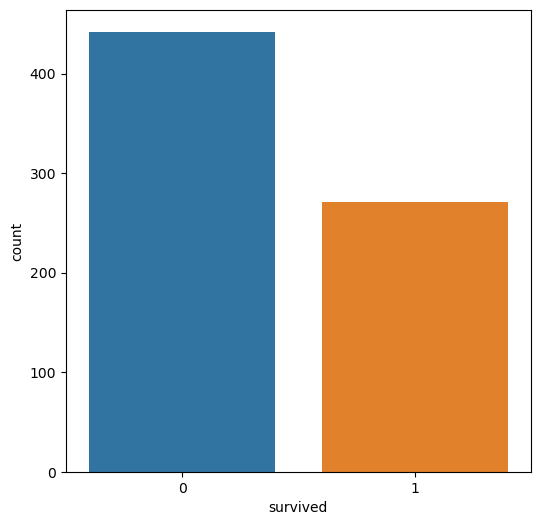

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0      sibsp           5.750351
1       fare          13.744741
2        age          19.775596
3      parch          23.562412


Analysis completed. No action taken.                                                    


['ticket', 'name']


passenger,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked,id
530,0,2,male,23,2,1,11.5,None,S,9
122,0,3,male,None,0,0,8.05,None,S,11
591,0,3,male,35,0,0,7.125,None,S,19
40,1,3,female,14,1,0,11.2417,None,C,10
305,0,3,male,None,0,0,8.05,None,S,13
732,0,3,male,11,0,0,18.7875,None,C,21
734,0,2,male,23,0,0,13.0,None,S,14
61,0,3,male,22,0,0,7.2292,None,C,22
469,0,3,male,None,0,0,7.725,None,Q,8
774,0,3,male,None,0,0,7.225,None,C,16


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


embarked: 2
age: 135
cabin: 542


['embarked']


passenger,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked,id
40,1,3,female,14,1,0,11.2417,None,C,10
530,0,2,male,23,2,1,11.5,None,S,9
101,0,3,female,28,0,0,7.8958,None,S,17
122,0,3,male,None,0,0,8.05,None,S,11
570,1,3,male,32,0,0,7.8542,None,S,15
835,0,3,male,18,0,0,8.3,None,S,23
734,0,2,male,23,0,0,13.0,None,S,14
61,0,3,male,22,0,0,7.2292,None,C,22
80,1,3,female,30,0,0,12.475,None,S,12
345,0,2,male,36,0,0,13.0,None,S,20


['cabin']


passenger,survived,pclass,sex,age,sibsp,parch,fare,embarked,id
530,0,2,male,23,2,1,11.5,S,9
122,0,3,male,None,0,0,8.05,S,11
591,0,3,male,35,0,0,7.125,S,19
734,0,2,male,23,0,0,13.0,S,14
40,1,3,female,14,1,0,11.2417,C,10
631,1,1,male,80,0,0,30.0,S,18
80,1,3,female,30,0,0,12.475,S,12
345,0,2,male,36,0,0,13.0,S,20
305,0,3,male,None,0,0,8.05,S,13
732,0,3,male,11,0,0,18.7875,C,21


age: mean


passenger,survived,pclass,sex,age,sibsp,parch,fare,embarked,id
305,0,3,male,30,0,0,8.05,S,13
80,1,3,female,30,0,0,12.475,S,12
345,0,2,male,36,0,0,13.0,S,20
734,0,2,male,23,0,0,13.0,S,14
122,0,3,male,30,0,0,8.05,S,11
591,0,3,male,35,0,0,7.125,S,19
570,1,3,male,32,0,0,7.8542,S,15
835,0,3,male,18,0,0,8.3,S,23
469,0,3,male,30,0,0,7.725,Q,8
774,0,3,male,30,0,0,7.225,C,16


['sex', 'embarked']


passenger,survived,pclass,sex_0,sex_1,age,sibsp,parch,fare,embarked_0,embarked_1,embarked_2,id
242,1,3,1,0,30,1,0,15.5,0,1,0,28
507,1,2,1,0,33,0,2,26.0,0,0,1,44
772,0,3,0,1,48,0,0,7.8542,0,0,1,52
587,0,2,0,1,47,0,0,15.0,0,0,1,60
240,0,2,0,1,33,0,0,12.275,0,0,1,76
505,1,1,1,0,16,0,0,86.5,0,0,1,84
852,0,3,0,1,74,0,0,7.775,0,0,1,68
38,0,3,0,1,21,0,0,8.05,0,0,1,36
345,0,2,0,1,36,0,0,13.0,0,0,1,20
80,1,3,1,0,30,0,0,12.475,0,0,1,12


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0      sibsp           5.766526
1        age           7.313643
2      parch          23.628692
3       fare          13.502110


['sibsp', 'age']


passenger,survived,pclass,sex_0,sex_1,age,sibsp,parch,fare,embarked_0,embarked_1,embarked_2,id
856,1,3,1,0,18,0,1,9.35,0,0,1,35
713,1,1,0,1,48,1,0,52.0,0,0,1,51
19,0,3,1,0,31,1,0,18.0,0,0,1,59
263,0,1,0,1,52,1,1,79.65,0,0,1,67
324,1,2,1,0,22,1,1,29.0,0,0,1,83
854,1,1,1,0,16,0,1,39.4,0,0,1,91
59,1,2,1,0,5,1,2,27.75,0,0,1,75
448,1,1,0,1,34,0,0,26.55,0,0,1,43
591,0,3,0,1,35,0,0,7.125,0,0,1,19
122,0,3,0,1,30,0,0,8.05,0,0,1,11


['fare', 'parch']


passenger,survived,pclass,sex_0,sex_1,age,sibsp,parch,fare,embarked_0,embarked_1,embarked_2,id
856,1,3,1,0,18,0,0,9.35,0,0,1,35
713,1,1,0,1,48,1,0,52.0,0,0,1,51
19,0,3,1,0,31,1,0,18.0,0,0,1,59
263,0,1,0,1,52,1,0,13.0,0,0,1,67
324,1,2,1,0,22,1,0,29.0,0,0,1,83
854,1,1,1,0,16,0,0,39.4,0,0,1,91
59,1,2,1,0,5,1,0,27.75,0,0,1,75
448,1,1,0,1,34,0,0,26.55,0,0,1,43
591,0,3,0,1,35,0,0,7.125,0,0,1,19
122,0,3,0,1,30,0,0,8.05,0,0,1,11


['sex_0', 'embarked_1', 'sex_1', 'embarked_0', 'age', 'embarked_2', 'passenger', 'sibsp', 'fare', 'pclass']


['age', 'passenger', 'sibsp', 'fare', 'pclass']


sex_0,embarked_1,sex_1,embarked_0,embarked_2,survived,id,age,passenger,sibsp,fare,pclass
1,0,0,1,0,1,10,0.21568627450980393,0.043820224719101124,0.5,0.19722280701754386,1.0
1,0,0,0,1,1,12,0.5294117647058824,0.08876404494382023,0.0,0.218859649122807,1.0
0,0,1,0,1,0,13,0.5294117647058824,0.3415730337078652,0.0,0.14122807017543862,1.0
0,0,1,0,1,0,14,0.39215686274509803,0.8235955056179776,0.0,0.22807017543859648,0.5
0,0,1,1,0,0,16,0.5294117647058824,0.8685393258426967,0.0,0.1267543859649123,1.0
1,0,0,0,1,0,17,0.49019607843137253,0.11235955056179775,0.0,0.13852280701754385,1.0
0,0,1,0,1,1,15,0.5686274509803921,0.6393258426966292,0.0,0.13779298245614036,1.0
0,0,1,0,1,0,11,0.5294117647058824,0.13595505617977527,0.0,0.14122807017543862,1.0
0,0,1,0,1,0,9,0.39215686274509803,0.5943820224719101,1.0,0.20175438596491227,0.5
0,1,1,0,0,0,8,0.5294117647058824,0.5258426966292135,0.0,0.1355263157894737,1.0


['sex_0', 'embarked_1', 'sex_1', 'age', 'embarked_0', 'embarked_2', 'passenger', 'sibsp', 'parch', 'pclass', 'fare']


['r_age', 'r_passenger', 'r_sibsp', 'r_pclass', 'r_fare']


id,r_sex_0,r_sex_1,r_embarked_0,r_parch,r_embarked_1,survived,r_embarked_2,r_age,r_passenger,r_sibsp,r_pclass,r_fare
10,1,0,1,0,0,1,0,0.21568627450980393,0.043820224719101124,0.5,1.0,0.19722280701754386
12,1,0,0,0,0,1,1,0.5294117647058824,0.08876404494382023,0.0,1.0,0.218859649122807
13,0,1,0,0,0,0,1,0.5294117647058824,0.3415730337078652,0.0,1.0,0.14122807017543862
14,0,1,0,0,0,0,1,0.39215686274509803,0.8235955056179776,0.0,0.5,0.22807017543859648
16,0,1,1,0,0,0,0,0.5294117647058824,0.8685393258426967,0.0,1.0,0.1267543859649123
17,1,0,0,0,0,0,1,0.49019607843137253,0.11235955056179775,0.0,1.0,0.13852280701754385
15,0,1,0,0,0,1,1,0.5686274509803921,0.6393258426966292,0.0,1.0,0.13779298245614036
11,0,1,0,0,0,0,1,0.5294117647058824,0.13595505617977527,0.0,1.0,0.14122807017543862
9,0,1,0,0,0,0,1,0.39215686274509803,0.5943820224719101,1.0,0.5,0.20175438596491227
8,0,1,0,0,1,0,0,0.5294117647058824,0.5258426966292135,0.0,1.0,0.1355263157894737


['passenger', 'pclass', 'age', 'sibsp', 'fare']


sex_0,embarked_1,sex_1,embarked_0,embarked_2,parch,survived,id,passenger,pclass,age,sibsp,fare
0,1,1,0,0,0,0,8,0.5258426966292135,1.0,0.5294117647058824,0.0,0.1355263157894737
0,0,1,0,1,0,0,13,0.3415730337078652,1.0,0.5294117647058824,0.0,0.14122807017543862
0,0,1,1,0,0,0,21,0.8213483146067416,1.0,0.1568627450980392,0.0,0.32960526315789473
0,0,1,0,1,0,0,14,0.8235955056179776,0.5,0.39215686274509803,0.0,0.22807017543859648
0,0,1,0,1,0,0,9,0.5943820224719101,0.5,0.39215686274509803,1.0,0.20175438596491227
1,0,0,0,1,0,0,17,0.11235955056179775,1.0,0.49019607843137253,0.0,0.13852280701754385
0,0,1,0,1,0,1,15,0.6393258426966292,1.0,0.5686274509803921,0.0,0.13779298245614036
0,0,1,0,1,0,0,23,0.9370786516853933,1.0,0.29411764705882354,0.0,0.1456140350877193
1,0,0,0,1,0,1,12,0.08876404494382023,1.0,0.5294117647058824,0.0,0.218859649122807
0,0,1,0,1,0,0,20,0.3865168539325843,0.5,0.6470588235294118,0.0,0.22807017543859648


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5']


response_column : survived                                                                                                                            
name : glm
family : BINOMIAL
lambda1 : (0.001, 0.02, 0.1)
alpha : (0.15, 0.85)
learning_rate : OPTIMAL
initial_eta : (0.05, 0.1)
momentum : (0.65, 0.8, 0.95)
iter_num_no_change : (5, 10, 50)
iter_max : (300, 200, 400)
batch_size : (10, 50, 60, 80)
Total number of models for glm : 1296
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : survived
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.3)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
iter_num : (10, 20, 30)
seed : 42
Total number of models for xgboost : 2592
-----------------------------------------

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,DECISIONFOREST_3,lasso,0.816,0.816,0.816,0.816,0.806990,0.816058,0.810118,0.821300,0.816,0.817337
1,2,DECISIONFOREST_0,lasso,0.808,0.808,0.808,0.808,0.803885,0.787728,0.793616,0.806734,0.808,0.805385
2,3,DECISIONFOREST_1,rfe,0.808,0.808,0.808,0.808,0.803885,0.787728,0.793616,0.806734,0.808,0.805385
3,4,XGBOOST_2,pca,0.792,0.792,0.792,0.792,0.781821,0.781821,0.781821,0.792000,0.792,0.792000
4,5,XGBOOST_0,lasso,0.784,0.784,0.784,0.784,0.775751,0.786117,0.778325,0.792884,0.784,0.785986
5,6,XGBOOST_3,lasso,0.784,0.784,0.784,0.784,0.775751,0.786117,0.778325,0.792884,0.784,0.785986
6,7,XGBOOST_1,rfe,0.784,0.784,0.784,0.784,0.775751,0.786117,0.778325,0.792884,0.784,0.785986
7,8,DECISIONFOREST_2,pca,0.728,0.728,0.728,0.728,0.714403,0.711063,0.712527,0.726245,0.728,0.726933
8,9,GLM_2,pca,0.712,0.712,0.712,0.712,0.711222,0.665279,0.669118,0.711555,0.712,0.694847
9,10,GLM_0,lasso,0.704,0.704,0.704,0.704,0.702632,0.655075,0.657636,0.703200,0.704,0.684850


In [17]:
# Fitting train data 

aml.fit(titanic_train, 'survived')

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [18]:
# Fetching leaderboard

aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,DECISIONFOREST_3,lasso,0.816,0.816,0.816,0.816,0.806990,0.816058,0.810118,0.821300,0.816,0.817337
1,2,DECISIONFOREST_0,lasso,0.808,0.808,0.808,0.808,0.803885,0.787728,0.793616,0.806734,0.808,0.805385
2,3,DECISIONFOREST_1,rfe,0.808,0.808,0.808,0.808,0.803885,0.787728,0.793616,0.806734,0.808,0.805385
3,4,XGBOOST_2,pca,0.792,0.792,0.792,0.792,0.781821,0.781821,0.781821,0.792000,0.792,0.792000
4,5,XGBOOST_0,lasso,0.784,0.784,0.784,0.784,0.775751,0.786117,0.778325,0.792884,0.784,0.785986
5,6,XGBOOST_3,lasso,0.784,0.784,0.784,0.784,0.775751,0.786117,0.778325,0.792884,0.784,0.785986
6,7,XGBOOST_1,rfe,0.784,0.784,0.784,0.784,0.775751,0.786117,0.778325,0.792884,0.784,0.785986
7,8,DECISIONFOREST_2,pca,0.728,0.728,0.728,0.728,0.714403,0.711063,0.712527,0.726245,0.728,0.726933
8,9,GLM_2,pca,0.712,0.712,0.712,0.712,0.711222,0.665279,0.669118,0.711555,0.712,0.694847
9,10,GLM_0,lasso,0.704,0.704,0.704,0.704,0.702632,0.655075,0.657636,0.703200,0.704,0.684850


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [19]:
# Fetching best performing model
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,DECISIONFOREST_3,lasso,0.816,0.816,0.816,0.816,0.80699,0.816058,0.810118,0.8213,0.816,0.817337


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [20]:
aml.model_hyperparameters(rank=1)

{'response_column': 'survived',
 'name': 'decision_forest',
 'tree_type': 'Classification',
 'min_impurity': 0.0,
 'max_depth': 5,
 'min_node_size': 1,
 'num_trees': 20,
 'seed': 42,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0']}

In [21]:
aml.model_hyperparameters(rank=4)

{'response_column': 'survived',
 'name': 'xgboost',
 'model_type': 'Classification',
 'column_sampling': 1,
 'min_impurity': 0.0,
 'lambda1': 0.01,
 'shrinkage_factor': 0.5,
 'max_depth': 5,
 'min_node_size': 1,
 'iter_num': 10,
 'seed': 42,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0']}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [22]:
# Fetching prediction on test data
prediction = aml.predict(titanic_test)

Data Transformation started ...


passenger,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked,id
202,0,3,male,None,8,2,69.55,None,S,15
303,0,3,male,19,0,0,0.0,None,S,11
465,0,3,male,None,0,0,8.05,None,S,19
183,0,3,male,9,4,2,31.3875,None,S,8
326,1,1,female,36,0,0,135.6333,C32,C,13
385,0,3,male,None,0,0,7.8958,None,S,21
120,0,3,female,2,4,2,31.275,None,S,10
751,1,2,female,4,1,1,23.0,None,S,18
425,0,3,male,18,1,1,20.2125,None,S,12
118,0,2,male,29,1,0,21.0,None,S,20


sex,id,embarked,cabin,age,passenger,sibsp,parch,fare,pclass,survived
female,10,S,None,2,120,4,2,31.275,3,0
male,15,S,None,None,202,8,2,69.55,3,0
male,23,S,C95,None,528,0,0,221.7792,1,0
female,9,Q,None,None,265,0,0,7.75,3,0
male,12,S,None,18,425,1,1,20.2125,3,0
male,20,S,None,29,118,1,0,21.0,2,0
female,14,S,None,None,181,8,2,69.55,3,0
female,22,S,B22,36,541,0,2,71.0,1,1
female,13,C,C32,36,326,0,0,135.6333,1,1
male,21,S,None,None,385,0,0,7.8958,3,0


sex,id,embarked,age,passenger,sibsp,parch,fare,pclass,survived
female,9,Q,None,265,0,0,7.75,3,0
male,11,S,19,303,0,0,0.0,3,0
male,19,S,None,465,0,0,8.05,3,0
female,13,C,36,326,0,0,135.6333,1,1
female,14,S,None,181,8,2,69.55,3,0
female,22,S,36,541,0,2,71.0,1,1
male,15,S,None,202,8,2,69.55,3,0
male,23,S,None,528,0,0,221.7792,1,0
male,12,S,18,425,1,1,20.2125,3,0
male,20,S,29,118,1,0,21.0,2,0


sex,id,embarked,age,passenger,sibsp,parch,fare,pclass,survived
female,9,Q,30,265,0,0,7.75,3,0
female,13,C,36,326,0,0,135.6333,1,1
male,21,S,30,385,0,0,7.8958,3,0
female,10,S,2,120,4,2,31.275,3,0
male,12,S,18,425,1,1,20.2125,3,0
male,20,S,29,118,1,0,21.0,2,0
male,15,S,30,202,8,2,69.55,3,0
male,23,S,30,528,0,0,221.7792,1,0
female,14,S,30,181,8,2,69.55,3,0
female,22,S,36,541,0,2,71.0,1,1


sex_0,sex_1,id,embarked_0,embarked_1,embarked_2,age,passenger,sibsp,parch,fare,pclass,survived
1,0,163,0,0,1,35,212,0,0,21.0,2,1
1,0,40,0,0,1,30,236,0,0,7.55,3,0
1,0,48,0,0,1,38,26,1,5,31.3875,3,1
1,0,72,0,0,1,24,346,0,0,13.0,2,1
1,0,88,1,0,0,45,363,0,1,14.4542,3,0
1,0,104,0,0,1,21,403,1,0,9.825,3,0
0,1,27,0,0,1,20,665,1,0,7.925,3,1
0,1,51,0,0,1,26,70,2,0,8.6625,3,0
0,1,59,0,0,1,50,661,2,0,133.65,1,1
0,1,67,0,0,1,33,720,0,0,7.775,3,0


id,sex_0,embarked_1,sex_1,embarked_0,age,embarked_2,passenger,sibsp,fare,pclass,survived
48,1,0,0,0,38,1,26,1,31.3875,3,1
88,1,0,0,1,45,0,363,0,14.4542,3,0
104,1,0,0,0,21,1,403,1,9.825,3,0
168,1,1,0,0,22,0,290,0,7.75,3,1
41,1,0,0,0,18,1,787,0,7.4958,3,1
105,1,0,0,0,47,1,872,1,52.5542,1,1
59,0,0,1,0,50,1,661,2,133.65,1,1
83,0,0,1,0,42,1,350,0,8.6625,3,0
91,0,0,1,0,1,1,184,2,39.0,2,1
107,0,0,1,0,28,1,201,0,9.5,3,0


sex_0,embarked_1,sex_1,embarked_0,embarked_2,survived,id,age,passenger,sibsp,fare,pclass
1,0,0,0,1,1,48,0.6862745098039216,0.028089887640449437,0.5,0.5506578947368421,1.0
1,0,0,1,0,0,88,0.8235294117647058,0.4067415730337079,0.0,0.25358245614035085,1.0
1,0,0,0,1,0,104,0.35294117647058826,0.451685393258427,0.5,0.17236842105263156,1.0
1,1,0,0,0,1,168,0.37254901960784315,0.32471910112359553,0.0,0.13596491228070176,1.0
1,0,0,0,1,1,41,0.29411764705882354,0.8831460674157303,0.0,0.13150526315789474,1.0
1,0,0,0,1,1,105,0.8627450980392157,0.9786516853932584,0.5,0.9220035087719298,0.0
0,0,1,0,1,1,59,0.9215686274509803,0.7415730337078652,1.0,2.3447368421052635,0.0
0,0,1,0,1,0,83,0.7647058823529411,0.3921348314606742,0.0,0.15197368421052632,1.0
0,0,1,0,1,1,91,-0.0392156862745098,0.20561797752808988,1.0,0.6842105263157895,0.5
0,0,1,0,1,0,107,0.49019607843137253,0.2247191011235955,0.0,0.16666666666666666,1.0


id,sex_0,embarked_1,sex_1,age,embarked_0,embarked_2,passenger,sibsp,parch,pclass,fare,survived
48,1,0,0,38,0,1,26,1,5,3,31.3875,1
88,1,0,0,45,1,0,363,0,1,3,14.4542,0
104,1,0,0,21,0,1,403,1,0,3,9.825,0
168,1,1,0,22,0,0,290,0,0,3,7.75,1
41,1,0,0,18,0,1,787,0,0,3,7.4958,1
105,1,0,0,47,0,1,872,1,1,1,52.5542,1
59,0,0,1,50,0,1,661,2,0,1,133.65,1
83,0,0,1,42,0,1,350,0,0,3,8.6625,0
91,0,0,1,1,0,1,184,2,1,2,39.0,1
107,0,0,1,28,0,1,201,0,0,3,9.5,0


id,r_sex_0,r_sex_1,r_embarked_0,r_parch,r_embarked_1,survived,r_embarked_2,r_age,r_passenger,r_sibsp,r_pclass,r_fare
48,1,0,0,5,0,1,1,0.6862745098039216,0.028089887640449437,0.5,1.0,0.5506578947368421
88,1,0,1,1,0,0,0,0.8235294117647058,0.4067415730337079,0.0,1.0,0.25358245614035085
104,1,0,0,0,0,0,1,0.35294117647058826,0.451685393258427,0.5,1.0,0.17236842105263156
168,1,0,0,0,1,1,0,0.37254901960784315,0.32471910112359553,0.0,1.0,0.13596491228070176
41,1,0,0,0,0,1,1,0.29411764705882354,0.8831460674157303,0.0,1.0,0.13150526315789474
105,1,0,0,1,0,1,1,0.8627450980392157,0.9786516853932584,0.5,0.0,0.9220035087719298
59,0,1,0,0,0,1,1,0.9215686274509803,0.7415730337078652,1.0,0.0,2.3447368421052635
83,0,1,0,0,0,0,1,0.7647058823529411,0.3921348314606742,0.0,1.0,0.15197368421052632
91,0,1,0,1,0,1,1,-0.0392156862745098,0.20561797752808988,1.0,0.5,0.6842105263157895
107,0,1,0,0,0,0,1,0.49019607843137253,0.2247191011235955,0.0,1.0,0.16666666666666666


sex_0,embarked_1,sex_1,embarked_0,embarked_2,parch,survived,id,passenger,pclass,age,sibsp,fare
1,0,0,0,1,5,1,48,0.028089887640449437,1.0,0.6862745098039216,0.5,0.5506578947368421
1,0,0,1,0,1,0,88,0.4067415730337079,1.0,0.8235294117647058,0.0,0.25358245614035085
1,0,0,0,1,0,0,104,0.451685393258427,1.0,0.35294117647058826,0.5,0.17236842105263156
1,1,0,0,0,0,1,168,0.32471910112359553,1.0,0.37254901960784315,0.0,0.13596491228070176
1,0,0,0,1,0,1,41,0.8831460674157303,1.0,0.29411764705882354,0.0,0.13150526315789474
1,0,0,0,1,1,1,105,0.9786516853932584,0.0,0.8627450980392157,0.5,0.9220035087719298
0,0,1,0,1,0,1,59,0.7415730337078652,0.0,0.9215686274509803,1.0,2.3447368421052635
0,0,1,0,1,0,0,83,0.3921348314606742,1.0,0.7647058823529411,0.0,0.15197368421052632
0,0,1,0,1,1,1,91,0.20561797752808988,0.5,-0.0392156862745098,1.0,0.6842105263157895
0,0,1,0,1,0,0,107,0.2247191011235955,1.0,0.49019607843137253,0.0,0.16666666666666666


,id,col_0,col_1,col_2,col_3,col_4,col_5,survived
0,163,0.737094,-0.643210,-0.106455,-0.013106,0.211914,-0.291361,1
1,59,-0.264140,-0.088646,-1.334543,0.554672,0.042260,1.240676,1
2,40,0.633324,-0.702354,0.379652,-0.240178,0.187011,-0.247377,0
3,83,-0.655426,-0.162827,0.173182,-0.087436,0.108885,-0.110638,0
4,48,0.709263,-0.709839,0.215808,-0.146823,0.537865,0.255863,1
5,91,-0.425439,-0.137706,-0.349825,0.069458,0.538132,0.844262,1
6,72,0.728169,-0.647291,-0.048971,-0.068199,0.065490,-0.282484,1
7,107,-0.648931,-0.165699,0.217979,-0.118870,0.276722,-0.131621,0
8,88,1.126607,0.586259,0.442777,-0.465046,0.025732,-0.184397,0
9,131,-0.605878,-0.178108,0.167856,-0.131784,0.125334,0.383804,0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being picked for evaluation:
Model ID : DECISIONFOREST_3 
Feature Selection Method : lasso

Prediction : 
    id  prediction  prob_1  prob_0  survived
0   48           1    0.70    0.30         1
1   88           1    0.70    0.30         0
2  104           1    0.65    0.35         0
3  168           1    0.65    0.35         1
4   41           1    0.55    0.45         1
5  105           1    0.85    0.15         1
6   59           1    0.60    0.40         1
7   83           0    0.15    0.85         0
8   91           1    0.60    0.40         1
9  107           0    0.15    0.85         0

ROC-AUC : 


AUC,GINI
0.8167039620902988,0.6334079241805977


threshold_value,tpr,fpr
0.04081632653061224,1.0,1.0
0.08163265306122448,1.0,0.9906542056074766
0.1020408163265306,1.0,0.9719626168224299
0.12244897959183673,1.0,0.9719626168224299
0.16326530612244897,0.9577464788732394,0.7850467289719626
0.18367346938775508,0.9577464788732394,0.7850467289719626
0.14285714285714285,1.0,0.9719626168224299
0.061224489795918366,1.0,0.9906542056074766
0.02040816326530612,1.0,1.0
0.0,1.0,1.0



Confusion Matrix : 


array([[80, 27],
       [19, 52]], dtype=int64)

In [23]:
# Printing prediction
prediction.head()

id,prediction,prob_1,prob_0,survived
10,1,0.75,0.25,0
12,0,0.35,0.65,0
13,1,0.85,0.15,1
14,1,0.75,0.25,0
16,0,0.25,0.75,0
17,1,0.65,0.35,1
15,0,0.4,0.6,0
11,0,0.25,0.75,0
9,1,0.65,0.35,0
8,0,0.5,0.5,0


In [24]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(titanic_test)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : DECISIONFOREST_3 
Feature Selection Method : lasso

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1       80       19   0.808081  0.747664  0.776699      107
1               1  CLASS_2       27       52   0.658228  0.732394  0.693333       71
--------------------------------------------------------------------------------
   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.741573
1       5     Macro-Precision     0.733154
2       6        Macro-Recall     0.740029
3       7            Macro-F1     0.735016
4       9     Weighted-Recall     0.741573
5      10         Weighted-F1     0.743446
6       8  Weighted-Precision     0.748308
7       4            Micro-F1     0.74

In [25]:
performance_metrics

SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,Precision,Recall,F1,Support
0,0,CLASS_1,80,19,0.8080808080808081,0.7476635514018691,0.7766990291262135,107
1,1,CLASS_2,27,52,0.6582278481012658,0.7323943661971831,0.6933333333333334,71


In [26]:
# Fetching prediction on test data
prediction = aml.predict(titanic_test, rank=3)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : DECISIONFOREST_1 
Feature Selection Method : rfe

Prediction : 
    id  prediction  prob_1  prob_0  survived
0   48           1     1.0     0.0         1
1   88           1     1.0     0.0         0
2  104           0     0.0     1.0         0
3  168           1     1.0     0.0         1
4   41           1     1.0     0.0         1
5  105           1     1.0     0.0         1
6   59           1     1.0     0.0         1
7   83           0     0.0     1.0         0
8   91           1     1.0     0.0         1
9  107           0     0.0     1.0         0

ROC-AUC : 


AUC,GINI
0.7329208898249309,0.46584177964986173


threshold_value,tpr,fpr
0.04081632653061224,0.8028169014084507,0.18691588785046728
0.08163265306122448,0.8028169014084507,0.18691588785046728
0.1020408163265306,0.8028169014084507,0.18691588785046728
0.12244897959183673,0.8028169014084507,0.18691588785046728
0.16326530612244897,0.8028169014084507,0.18691588785046728
0.18367346938775508,0.8028169014084507,0.18691588785046728
0.14285714285714285,0.8028169014084507,0.18691588785046728
0.061224489795918366,0.8028169014084507,0.18691588785046728
0.02040816326530612,0.8028169014084507,0.18691588785046728
0.0,1.0,1.0



Confusion Matrix : 


array([[87, 20],
       [14, 57]], dtype=int64)

In [27]:
# Printing prediction
prediction.head()

id,prediction,prob_1,prob_0,survived
10,1,1.0,0.0,0
12,0,0.0,1.0,0
13,1,1.0,0.0,1
14,1,1.0,0.0,0
16,0,0.0,1.0,0
17,1,1.0,0.0,1
15,1,1.0,0.0,0
11,0,0.0,1.0,0
9,1,1.0,0.0,0
8,1,1.0,0.0,0


In [28]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(titanic_test, rank=3)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : DECISIONFOREST_1 
Feature Selection Method : rfe

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1       87       14   0.861386  0.813084  0.836538      107
1               1  CLASS_2       20       57   0.740260  0.802817  0.770270       71
--------------------------------------------------------------------------------
   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.808989
1       5     Macro-Precision     0.800823
2       6        Macro-Recall     0.807951
3       7            Macro-F1     0.803404
4       9     Weighted-Recall     0.808989
5      10         Weighted-F1     0.810106
6       8  Weighted-Precision     0.813072
7       4            Micro-F1     0.8089

In [29]:
performance_metrics

SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,Precision,Recall,F1,Support
0,0,CLASS_1,87,14,0.8613861386138614,0.8130841121495327,0.8365384615384616,107
1,1,CLASS_2,20,57,0.7402597402597403,0.8028169014084507,0.7702702702702703,71


## <b><span style='color:#F1A424'>| 7.</span> Deploy Trained Model : </b>

#### 7.1. Deploy top 10 models

In [30]:
aml.deploy(table_name='top_10_models', top_n=10)

Model Deployment Completed Successfully.


#### 7.2. Deploy models using list of model ranks

In [31]:
aml.deploy(table_name='mixed_models', ranks=[1,4,9,7])

Model Deployment Completed Successfully.


#### 7.3. Deploy models using range of model rank

In [32]:
aml.deploy(table_name='range_models', ranks=range(4,7))

Model Deployment Completed Successfully.


##### Note: 
 - After deployment, saved models can be loaded in same session or different session using table name. After loading models can be used for predict and evaluate. Please refer to notebook: `Binary_Classification__Titanic_Survival_Prediction_Load_Models` for more details.

In [33]:
remove_context()

True